ALL EIGENVALUES AND EIGENVECTORS

In [ ]:
import numpy as np
def termcrit(xolds,xnews):
  errs = np.abs((xnews - xolds)/xnews)
  return np.sum(errs)
def forsub(L,bs):
  n = bs.size
  xs = np.zeros(n)
  for i in range(n):
    xs[i] = (bs[i] - L[i,:i]@xs[:i])/L[i,i]
  return xs
def backsub(U,bs):
  n = bs.size
  xs = np.zeros(n)
  for i in reversed(range(n)):
    xs[i] = (bs[i] - U[i,i+1:]@xs[i+1:])/U[i,i]
  return xs

def ludec(A):
  n = A.shape[0]
  U = np.copy(A)
  L = np.identity(n)
  for j in range(n-1):
    for i in range(j+1,n):
      coeff = U[i,j]/U[j,j]
      U[i,j:] -= coeff*U[j,j:]
      L[i,j] = coeff
  return L, U

def invpowershift(A,shift=20,kmax=200,tol=1.e-8):
  n = A.shape[0]
  znews = np.ones(n)
  qnews = znews/mag(znews)
  Astar = A - np.identity(n)*shift
  L, U = ludec(Astar)
  for k in range(1,kmax):
    qs = np.copy(qnews)
    ys = forsub(L,qs)
    znews = backsub(U,ys)
    qnews = znews/mag(znews)
    if qs@qnews<0:
      qnews = -qnews
    err = termcrit(qs, qnews)
    print(k, qnews, err)
    if err < tol:
      lam = qnews@A@qnews
      break
  else:
    lam = qnews = None
  return lam, qnews
def mag(xs):
 return np.sqrt(np.sum(xs*xs))
def testcreate(n,val):
  A = np.arange(val,val+n*n).reshape(n,n)
  A = np.sqrt(A)
  bs = (A[0,:])**2.1
  return A, bs
def qrdec(A):
  n = A.shape[0]
  Ap = np.copy(A)
  Q = np.zeros((n,n))
  R = np.zeros((n,n))
  for j in range(n):
    for i in range(j):
      R[i,j] = Q[:,i]@A[:,j]
      Ap[:,j] -= R[i,j]*Q[:,i]
    R[j,j] = mag(Ap[:,j])
    Q[:,j] = Ap[:,j]/R[j,j]
  return Q, R
def qrmet(inA,kmax=100):
  A = np.copy(inA)
  for k in range(1,kmax):
    Q, R = qrdec(A)
    A = R@Q
    print(k, np.diag(A))
  qreigvals = np.diag(A)
  return qreigvals
def eig(A,eps=1.e-12):
  n = A.shape[0]
  eigvals = np.zeros(n)
  eigvecs = np.zeros((n,n))
  qreigvals = qrmet(A)
  for i, qre in enumerate(qreigvals):
    eigvals[i], eigvecs[:,i] = invpowershift(A,qre+eps)
  return eigvals, eigvecs
def testeigall(f,A):
  eigvals, eigvecs = f(A)
  npeigvals, npeigvecs = np.linalg.eig(A)
  print(eigvals); print(npeigvals)
  print(" ")
  for eigvec, npeigvec in zip(eigvecs.T,npeigvecs.T):
    print(eigvec); print(npeigvec)
    print(" ")

A, _ = testcreate(4,21)
testeigall(eig,A)

1 [ 2.13103450e+01 -6.09089099e-02 -7.63972225e-05 -9.18570315e-08]
2 [ 2.13166811e+01 -6.72521830e-02 -6.93094896e-05 -7.50301569e-08]
3 [ 2.13166626e+01 -6.72336565e-02 -6.93022714e-05 -7.50128526e-08]
4 [ 2.13166627e+01 -6.72337150e-02 -6.93022639e-05 -7.50128339e-08]
5 [ 2.13166627e+01 -6.72337148e-02 -6.93022639e-05 -7.50128339e-08]
6 [ 2.13166627e+01 -6.72337148e-02 -6.93022639e-05 -7.50128339e-08]
7 [ 2.13166627e+01 -6.72337148e-02 -6.93022639e-05 -7.50128339e-08]
8 [ 2.13166627e+01 -6.72337148e-02 -6.93022639e-05 -7.50128339e-08]
9 [ 2.13166627e+01 -6.72337148e-02 -6.93022639e-05 -7.50128339e-08]
10 [ 2.13166627e+01 -6.72337148e-02 -6.93022639e-05 -7.50128339e-08]
11 [ 2.13166627e+01 -6.72337148e-02 -6.93022639e-05 -7.50128339e-08]
12 [ 2.13166627e+01 -6.72337148e-02 -6.93022639e-05 -7.50128339e-08]
13 [ 2.13166627e+01 -6.72337148e-02 -6.93022639e-05 -7.50128339e-08]
14 [ 2.13166627e+01 -6.72337148e-02 -6.93022639e-05 -7.50128339e-08]
15 [ 2.13166627e+01 -6.72337148e-02 -6.9302

In [ ]:
import numpy as np
from scipy.linalg import eig
spin2 = np.array([[1,0,0,0],[0,-1,2,0],[0,2,-1,0],[0,0,0,1]])
w, vl, vr = eig(spin2, left=True)
idx = np.argsort(w)[::-1]
eigenValues = w[idx]
LeigenVectors =vl[:,idx]
eigenVectors = vr[:,idx]
print(spin2)
print(eigenValues, eigenVectors[:,0],eigenVectors[:,1], eigenVectors[:,2],eigenVectors[:,3])

[[ 1  0  0  0]
 [ 0 -1  2  0]
 [ 0  2 -1  0]
 [ 0  0  0  1]]
[ 1.+0.j  1.+0.j  1.+0.j -3.+0.j] [0.         0.70710678 0.70710678 0.        ] [0. 0. 0. 1.] [1. 0. 0. 0.] [ 0.          0.70710678 -0.70710678  0.        ]


0.0 0.25 -0.75 0.25 0.25
0.1 0.09999999999999998 -0.7524937810560447 0.25249378105604453 0.4
0.2 -0.050000000000000044 -0.7599019513592783 0.2599019513592785 0.55
0.30000000000000004 -0.20000000000000007 -0.7720153254455274 0.27201532544552753 0.7000000000000001
0.4 -0.3500000000000001 -0.7885164807134506 0.28851648071345043 0.8500000000000001
0.5 -0.5 -0.8090169943749472 0.30901699437494745 1.0
0.6000000000000001 -0.6500000000000001 -0.83309518948453 0.3330951894845302 1.1500000000000001
0.7000000000000001 -0.8 -0.8603277807866853 0.3603277807866851 1.3
0.8 -0.9500000000000002 -0.8903124237432848 0.39031242374328495 1.4500000000000002
0.9 -1.1 -0.9226812023536856 0.42268120235368545 1.6
1.0 -1.25 -0.9571067811865475 0.4571067811865475 1.75
1.1 -1.4000000000000001 -0.9933034373659254 0.49330343736592513 1.9000000000000001
1.2000000000000002 -1.5500000000000003 -1.0310249675906653 0.5310249675906654 2.0500000000000003
1.3 -1.7000000000000002 -1.070060973342837 0.5700609733428362 2.2
1.4

(-3.0, 3.0)

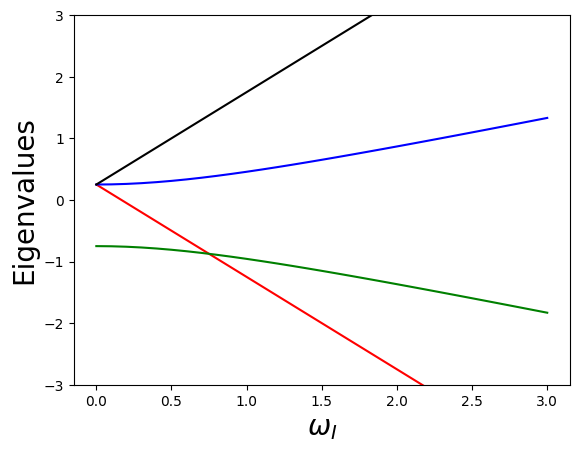

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def paulimatrices():
  sigx = np.array([0.,1,1,0]).reshape(2,2)
  sigy = np.array([0.,-1j,1j,0]).reshape(2,2)
  sigz = np.array([1.,0,0,-1]).reshape(2,2)
  return sigx, sigy, sigz
def mag(xs):
 return np.sqrt(np.sum(xs*xs))
def qrdec(A):
  n = A.shape[0]
  Ap = np.copy(A)
  Q = np.zeros((n,n))
  R = np.zeros((n,n))
  for j in range(n):
    for i in range(j):
      R[i,j] = Q[:,i]@A[:,j]
      Ap[:,j] -= R[i,j]*Q[:,i]
    R[j,j] = mag(Ap[:,j])
    Q[:,j] = Ap[:,j]/R[j,j]
  return Q, R
def qrmet(inA,kmax=100):
  A = np.copy(inA)
  for k in range(1,kmax):
    Q, R = qrdec(A)
    A = R@Q
  qreigvals = np.diag(A)
  return qreigvals
def twospins(omI,omII,gam):
  hbar = 1.
  paulis = paulimatrices()
  iden = np.identity(2)
  SIs = [hbar*np.kron(pa,iden)/2 for pa in paulis]
  SIIs = [hbar*np.kron(iden,pa)/2 for pa in paulis]
  SIdotII=SIs[0]@SIIs[0] + SIs[1]@SIIs[1] + SIs[2]@SIIs[2]
  H = -omI*SIs[2] - omII*SIIs[2] + gam*SIdotII
  H = H.real
  return H
xs = (x * 0.1 for x in range(0, 31))
xs=list(xs)
x1=[]
y1=[]
y2=[]
y3=[]
y4=[]
for x in xs:
  H = twospins(x,2.*x,1.0)
  qreigvals = qrmet(H);
  print(x,qreigvals[0],qreigvals[1],qreigvals[2],qreigvals[3])
  x1.append(float(x))
  y1.append(float(qreigvals[0]))
  y2.append(float(qreigvals[1]))
  y3.append(float(qreigvals[2]))
  y4.append(float(qreigvals[3]))
plt.xlabel('$\omega_I$', fontsize=20)
plt.ylabel('Eigenvalues', fontsize=20)
plt.plot(x1,y1,color='red')
plt.plot(x1,y2,color='green')
plt.plot(x1,y3,color='blue')
plt.plot(x1,y4,color='black')
plt.ylim([-3, 3])

Function $f(x)=e^{x-\sqrt{x}}-x$

<ipython-input-1-a50bba335013>:6: RuntimeWarning: divide by zero encountered in divide
  return np.exp(x-np.sqrt(x))-1-1/(2*np.sqrt(x))


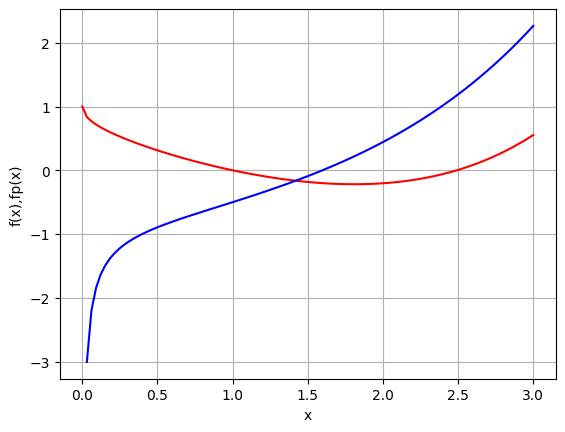

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
  return np.exp(x-np.sqrt(x))-x
def fp(x):
  return np.exp(x-np.sqrt(x))-1-1/(2*np.sqrt(x))
x=np.linspace(0,3,100)

plt.plot(x,f(x),'r')# adds a color for plot with dot dash line
plt.plot(x,fp(x),'b')
plt.xlabel('x')
plt.ylabel('f(x),fp(x)')
plt.grid()#adds a grid

plt.show()

**FIXED POINT ITERATION**

Plot of function $y=g(x)$ and $y=x$

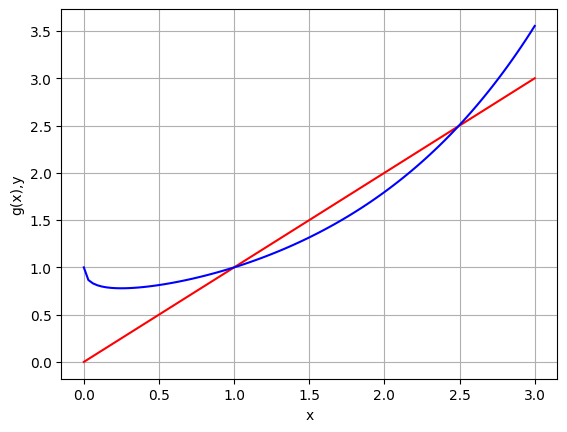

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def g(x):
  return np.exp(x-np.sqrt(x))
x=np.linspace(0,3,100)
y=x
plt.plot(x,y,'r')# adds a color for plot with dot dash line
plt.plot(x,g(x),'b')
plt.xlabel('x')
plt.ylabel('g(x),y')
plt.grid()#adds a grid

plt.show()

Fixed point iteration

In [3]:
from math import exp, sqrt
def g(x):
  return exp(x-sqrt(x))
def fixedpoint(g,xold,kmax=200,tol=1.e-8):
  for k in range(1,kmax):
    xnew = g(xold)
    xdiff = xnew-xold
    print("{0:2d} {1:1.16f} {2:1.16f}".format(k,xnew,xdiff))
    if abs(xdiff/xnew) < tol:
      break
    xold = xnew
  else:
    xnew = None
  return xnew
for xold in (0.99,2.499):
  x = fixedpoint(g,xold)
  print(x)

 1 0.9950249795068901 0.0050249795068901
 2 0.9975186749161311 0.0024936954092410
 3 0.9987608763846132 0.0012422014684821
 4 0.9993808220095828 0.0006199456249696
 5 0.9996905068451969 0.0003096848356141
 6 0.9998452773684844 0.0001547705232875
 7 0.9999226446689382 0.0000773673004538
 8 0.9999613238304214 0.0000386791614831
 9 0.9999806622891710 0.0000193384587497
10 0.9999903312380722 0.0000096689489012
11 0.9999951656424073 0.0000048344043351
12 0.9999975828270463 0.0000024171846390
13 0.9999987914149838 0.0000012085879375
14 0.9999993957078571 0.0000006042928733
15 0.9999996978540199 0.0000003021461628
16 0.9999998489270328 0.0000001510730129
17 0.9999999244635221 0.0000000755364894
18 0.9999999622317625 0.0000000377682403
19 0.9999999811158816 0.0000000188841192
20 0.9999999905579409 0.0000000094420592
0.9999999905579409
 1 2.5047211959255882 0.0057211959255881
 2 2.5145405344896088 0.0098193385640206
 3 2.5314955389430209 0.0169550044534121
 4 2.5610776263207149 0.02958208737769

OverflowError: math range error

changing xold for 2nd fixed point

In [4]:
from math import exp, sqrt
def g(x):
  return exp(x-sqrt(x))
def fixedpoint(g,xold,kmax=200,tol=1.e-8):
  for k in range(1,kmax):
    xnew = g(xold)
    xdiff = xnew-xold
    print("{0:2d} {1:1.16f} {2:1.16f}".format(k,xnew,xdiff))
    if abs(xdiff/xnew) < tol:
      break
    xold = xnew
  else:
    xnew = None
  return xnew
for xold in (0.99,2.49):
  x = fixedpoint(g,xold)
  print(x)

 1 0.9950249795068901 0.0050249795068901
 2 0.9975186749161311 0.0024936954092410
 3 0.9987608763846132 0.0012422014684821
 4 0.9993808220095828 0.0006199456249696
 5 0.9996905068451969 0.0003096848356141
 6 0.9998452773684844 0.0001547705232875
 7 0.9999226446689382 0.0000773673004538
 8 0.9999613238304214 0.0000386791614831
 9 0.9999806622891710 0.0000193384587497
10 0.9999903312380722 0.0000096689489012
11 0.9999951656424073 0.0000048344043351
12 0.9999975828270463 0.0000024171846390
13 0.9999987914149838 0.0000012085879375
14 0.9999993957078571 0.0000006042928733
15 0.9999996978540199 0.0000003021461628
16 0.9999998489270328 0.0000001510730129
17 0.9999999244635221 0.0000000755364894
18 0.9999999622317625 0.0000000377682403
19 0.9999999811158816 0.0000000188841192
20 0.9999999905579409 0.0000000094420592
0.9999999905579409
 1 2.4893624068818712 -0.0006375931181291
 2 2.4882783985020089 -0.0010840083798622
 3 2.4864366451795781 -0.0018417533224309
 4 2.4833110183801628 -0.0031256267

Taking log of both sides of $x=g(x)$

$x=\sqrt{x}+\log(x)=g(x)$


<ipython-input-5-ba7ef521f9e4>:4: RuntimeWarning: divide by zero encountered in log
  return np.sqrt(x)+np.log(x)


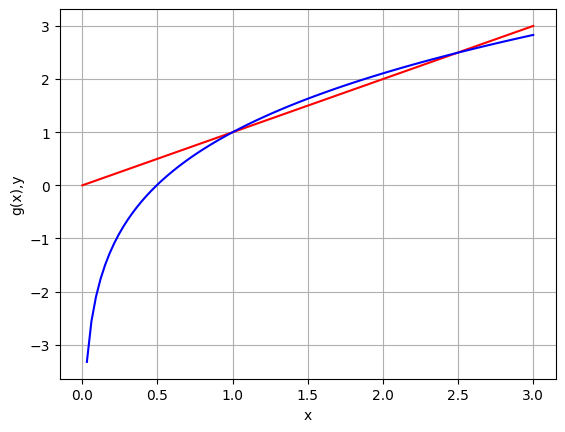

In [5]:
import numpy as np
import matplotlib.pyplot as plt
def g(x):
  return np.sqrt(x)+np.log(x)
x=np.linspace(0,3,100)
y=x
plt.plot(x,y,'r')# adds a color for plot with dot dash line
plt.plot(x,g(x),'b')
plt.xlabel('x')
plt.ylabel('g(x),y')
plt.grid()#adds a grid

plt.show()

In [6]:
import numpy as np
def g(x):
  return np.sqrt(x)+np.log(x)
def fixedpoint(g,xold,kmax=200,tol=1.e-8):
  for k in range(1,kmax):
    xnew = g(xold)
    xdiff = xnew-xold
    print("{0:2d} {1:1.16f} {2:1.16f}".format(k,xnew,xdiff))
    if abs(xdiff/xnew) < tol:
      break
    xold = xnew
  else:
    xnew = None
  return xnew
#for xold in (0.99,2.499):
for xold in (1.2,2.49):
  x = fixedpoint(g,xold)
  print(x)

 1 1.2777666718042868 0.0777666718042869
 2 1.3754971844146189 0.0977305126103321
 3 1.4916311753681093 0.1161339909534904
 4 1.6211938039989355 0.1295626286308262
 5 1.7564238841750359 0.1352300801761004
 6 1.8885812894211034 0.1321574052460674
 7 2.0100825382544976 0.1215012488333942
 8 2.1159495816110292 0.1058670433565316
 9 2.2041340799677132 0.0881844983566840
10 2.2749673656907126 0.0708332857229994
11 2.3302652022415438 0.0552978365508312
12 2.3725027014632132 0.0422374992216694
13 2.4042384471648335 0.0317357457016203
14 2.4277938874247496 0.0235554402599161
15 2.4451209349326559 0.0173270475079064
16 2.4577828312040468 0.0126618962713909
17 2.4669914026195432 0.0092085714154964
18 2.4736652631553033 0.0066738605357601
19 2.4784899707701751 0.0048247076148717
20 2.4819715590188873 0.0034815882487123
21 2.4844806488774451 0.0025090898585578
22 2.4862871835531362 0.0018065346756910
23 2.4875870007714913 0.0012998172183551
24 2.4885217750398683 0.0009347742683770
25 2.48919379031

**BISECTION METHOD**

In [7]:
from math import exp, sqrt
def f(x):
  return exp(x - sqrt(x)) - x
def bisection(f,x0,x1,kmax=200,tol=1.e-8):
  f0 = f(x0)
  for k in range(1,kmax):
    x2 = (x0+x1)/2
    f2 = f(x2)
    if f0*f2 < 0:
      x1 = x2
    else:
      x0, f0 = x2, f2
    x2new = (x0+x1)/2
    xdiff = abs(x2new-x2)
    rowf = "{0:2d} {1:1.16f} {2:1.16f} {3:1.16f}"
    print(rowf.format(k,x2new,xdiff,abs(f(x2new))))
    if abs(xdiff/x2new) < tol:
      break
  else:
    x2new = None
  return x2new
#if name == ‘ main ’:
root = bisection(f,0.,1.5)
print(root); print("")
root = bisection(f,1.5,3.)
print(root)

 1 1.1250000000000000 0.3750000000000000 0.0585452513912128
 2 0.9375000000000000 0.1875000000000000 0.0322220096468296
 3 1.0312500000000000 0.0937500000000000 0.0153801917893579
 4 0.9843750000000000 0.0468750000000000 0.0078734577169989
 5 1.0078125000000000 0.0234375000000000 0.0038909811511951
 6 0.9960937500000000 0.0117187500000000 0.0019569384633997
 7 1.0019531250000000 0.0058593750000000 0.0009756086699708
 8 0.9990234375000000 0.0029296875000000 0.0004885196492074
 9 1.0004882812500000 0.0014648437500000 0.0002440810179281
10 0.9997558593750000 0.0007324218750000 0.0001220852133581
11 1.0001220703125000 0.0003662109375000 0.0000610314309217
12 0.9999389648437500 0.0001831054687500 0.0000305185094428
13 1.0000305175781250 0.0000915527343750 0.0000152585562312
14 0.9999847412109375 0.0000457763671875 0.0000076294527388
15 1.0000076293945312 0.0000228881835938 0.0000038146827137
16 0.9999961853027344 0.0000114440917969 0.0000019073522708
17 1.0000019073486328 0.0000057220458984

NEWTON'S METHOD

In [9]:
from math import exp, sqrt, log
def f(x):
    return exp(x - sqrt(x)) - x
def fprime(x):
    return -1 + exp(x - sqrt(x))*(1 - 1/(2*sqrt(x)))
def newton(f,fprime,xold,kmax=200,eps=1.e-8):
    for k in range(1,kmax):
        xnew = xold - f(xold)/fprime(xold)
        xdiff = xnew - xold
        print("{0:2d} {1:1.16f} {2:1.16f}".format(k,xnew,xdiff))
        if abs(xdiff/xnew) < eps:
            break
        xold = xnew
    else:
        xnew = None
    return xnew
root=newton(f,fprime,2.6)
print(root);print("")

 1 2.5006716070657893 -0.0993283929342108
 2 2.4909978377827207 -0.0096737692830686
 3 2.4909093243204019 -0.0000885134623188
 4 2.4909093169459848 -0.0000000073744171
2.490909316945985



$f(x)=x^{4} -9 x^{3} +25 x^{2} -24 x +4 $